In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
data=loadmat("ex7data1.mat")

In [11]:
X=data["X"]

In [13]:
X.shape

(50, 2)

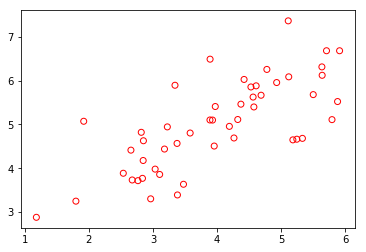

In [17]:
plt.scatter(X[:,0],X[:,1],marker="o",facecolor="none",edgecolor="r")
plt.show()

In [18]:
def feature_normalization(X):
    mean=X.mean(axis=0)
    std=X.std(axis=0)
    X=(X-mean)/std
    
    return X,mean,std

In [27]:
def pca(X):
    m,n=X.shape
    cor=(1/m*(X.T @ X))
    u,s,vh=np.linalg.svd(cor)
    return u,s,vh  

In [28]:
X,mean,std=feature_normalization(X)
U,S=pca(X)[:2]

In [29]:
U[0]

array([-0.70710678, -0.70710678])

In [33]:
def reduction(X,U,K):
    m=X.shape[0]
    U_reduced=U[:,:K]
    Z=np.zeros((m,K))
    for i in range(m):
        for j in range(K):
            Z[i,j]=X[i,:] @ U_reduced[:,j]
    return Z

In [34]:
Z=reduction(X,U,1)

In [38]:
Z[0][0]

1.4963126084578529

In [39]:
#recournce

In [46]:
def reversepca(Z,U,K):
    m,n=Z.shape[0],U.shape[0]
    X_rev=np.zeros((m,n))
    U_reduced=U[:,:K]
    for i in range(m):
        X_rev[i,:]=Z[i,:] @ U_reduced.T
        
    return X_rev

In [48]:
X_new=reversepca(Z,U,1)

In [49]:
X_new[0]

array([-1.05805279, -1.05805279])

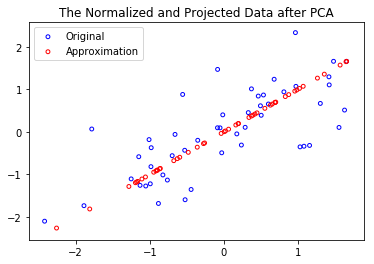

In [50]:
plt.scatter(X[:,0],X[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_new[:,0],X_new[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()
plt.show()

In [51]:
#face data

In [52]:
data=loadmat("ex7faces.mat")

In [56]:
X=data["X"]

In [58]:
X.shape

(5000, 1024)

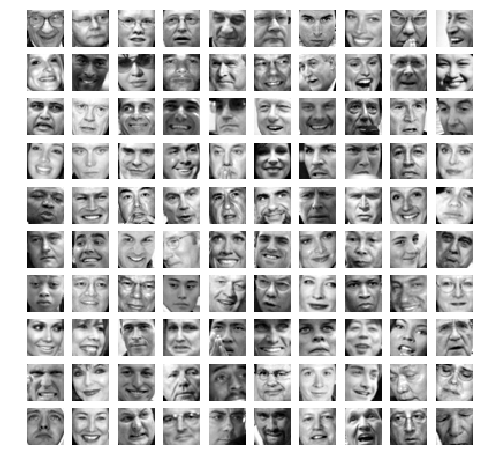

In [59]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

In [60]:
X=feature_normalization(X)[0]

In [64]:
U=pca(X)[0]

In [65]:
len(U)

1024

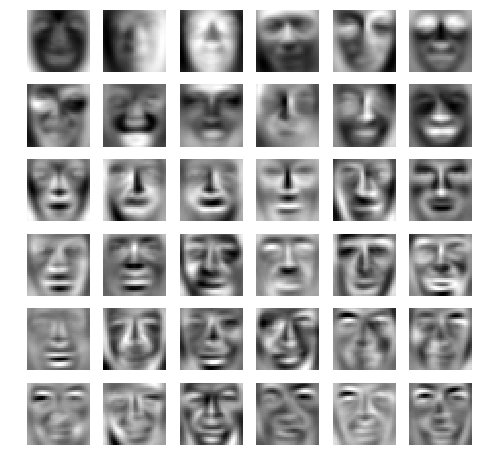

In [66]:
U_reduced = U[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

In [67]:
Z=reduction(X,U,100)

In [71]:
Z.shape

(5000, 100)

In [69]:
X_new=reversepca(Z,U,100)

In [70]:
X_new.shape

(5000, 1024)

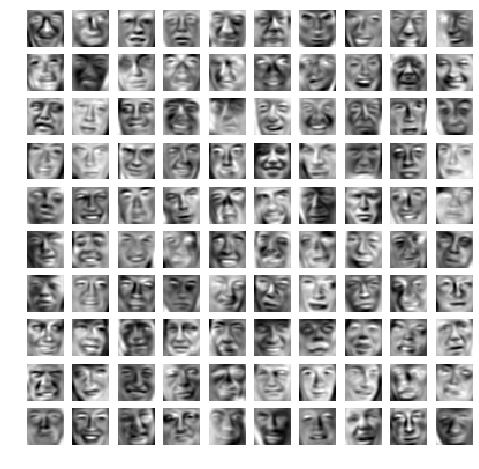

In [72]:
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_new[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")